In [0]:
import cv2
import numpy as np
import imutils
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage

from skimage import io
from matplotlib import pyplot as plt
from PIL import ImageEnhance, Image
from google.colab.patches import cv2_imshow

In [0]:
def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)
base_url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/"

In [0]:
def prepare_image(img_string):
  img = url_to_image(base_url + img_string)
  return img

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count1.jpg


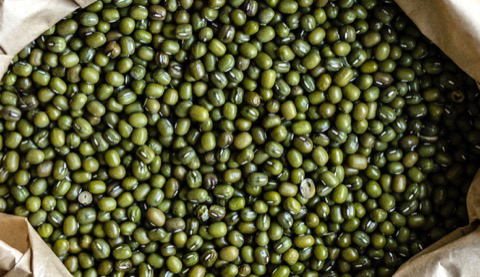

In [4]:
img = prepare_image("count1.jpg")
cv2_imshow(img)

In [0]:
def preprocess_image(simple_thresh, inverse):
  thresh_block_size=91
  thresh_sub_mean=9
  denoise_window_size=30
  denoise_search_window_size=30
  denoise_h=15
  grayscaled = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  if simple_thresh:
    if inverse:
      _, threshold = cv2.threshold(grayscaled, simple_thresh, 250, cv2.THRESH_BINARY_INV)
    else:
      _, threshold = cv2.threshold(grayscaled, simple_thresh, 250, cv2.THRESH_BINARY)
  else:
    threshold = cv2.adaptiveThreshold(grayscaled, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, thresh_block_size, thresh_sub_mean)
  cv2_imshow(threshold)
  return threshold

def get_watershed_count(image, min_distance=10, min_radius=0, max_radius=1000, circle=True, simple_thresh=None, inverse=False):
    image = image.copy()
    processed_image = preprocess_image(simple_thresh, inverse)
    
    distance = ndimage.distance_transform_edt(processed_image)
    localMax = peak_local_max(distance, indices=False, min_distance=min_distance, labels=processed_image)

    markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
    labels = watershed(-distance, markers, mask=processed_image)
    count = 0
    
    for label in np.unique(labels):
        if label == 0:
            continue

        mask = np.zeros(processed_image.shape, dtype="uint8")
        mask[labels == label] = 255

        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        m = max(cnts, key=cv2.contourArea)
        ((x, y), r) = cv2.minEnclosingCircle(m)
        if r >= min_radius and r <= max_radius:
            if circle:
                cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 1)
            else:
                cv2.drawContours(image, [m], -1, (0, 255, 0), 1)
            count += 1
    return image, count

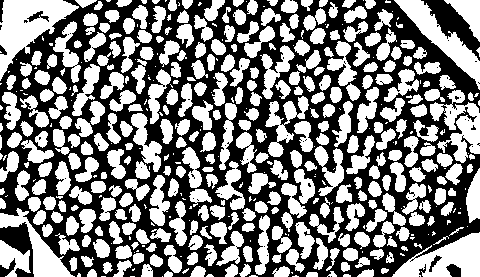

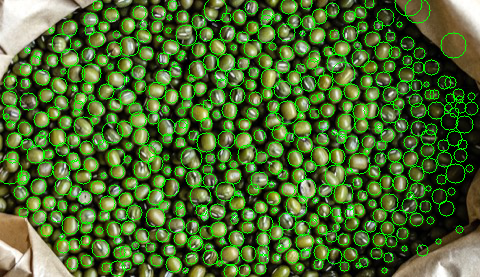

Count: 497


In [6]:
img, count = get_watershed_count(img, 4, 3, 15)
cv2_imshow(img)
print("Count: {}".format(count))

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count2.jpg


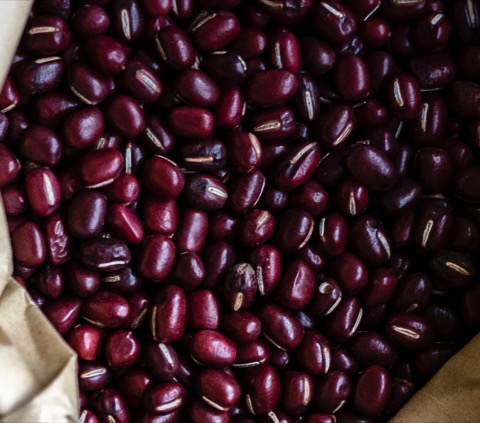

In [7]:
img = prepare_image("count2.jpg")
cv2_imshow(img)

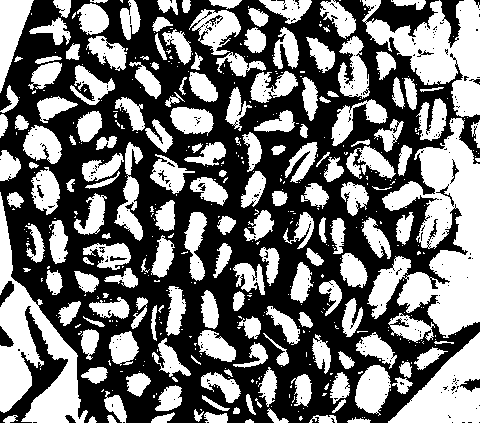

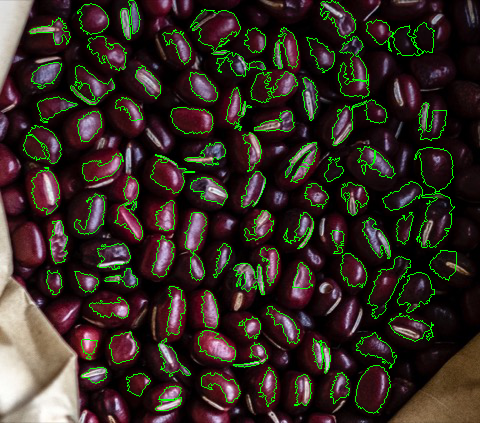

Count: 100


In [8]:
img, count = get_watershed_count(img, 20, 10, 40, circle=False)
cv2_imshow(img)
print("Count: {}".format(count))

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count3.jpg


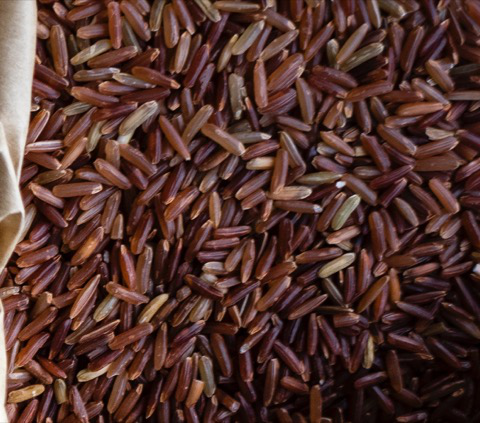

In [9]:
img = prepare_image("count3.jpg")
cv2_imshow(img)

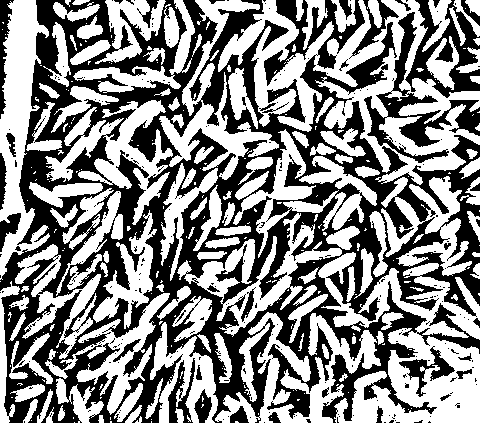

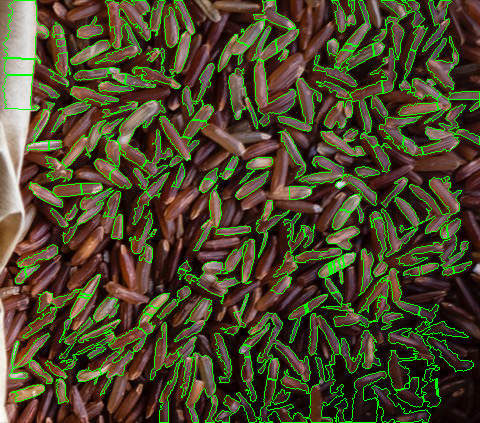

Count: 187


In [10]:
img, count = get_watershed_count(img, 15, 5, 40, circle=False)
cv2_imshow(img)
print("Count: {}".format(count))

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count4.jpg


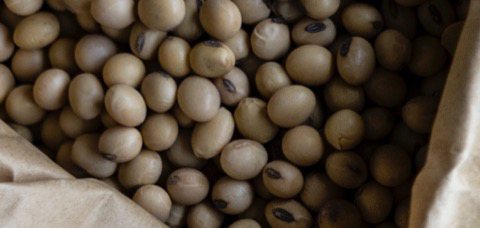

In [11]:
img = prepare_image("count4.jpg")
cv2_imshow(img)

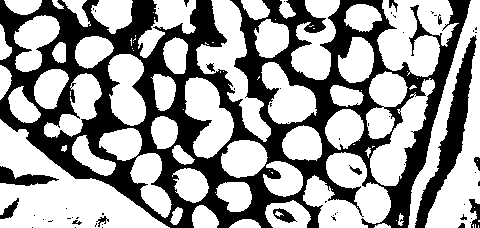

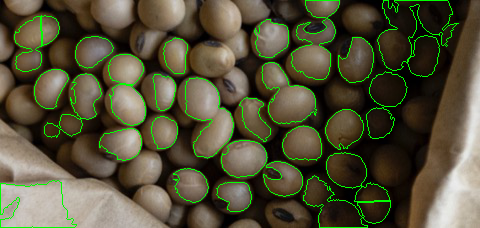

Count: 33


In [12]:
res, count = get_watershed_count(img, 25, 10, 50, circle=False)
cv2_imshow(res)
print("Count: {}".format(count))

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count5.jpg


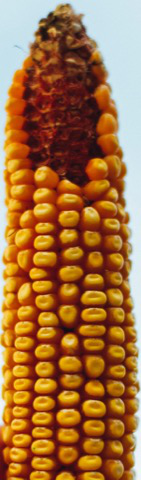

In [13]:
img = prepare_image("count5.jpg")
cv2_imshow(img)

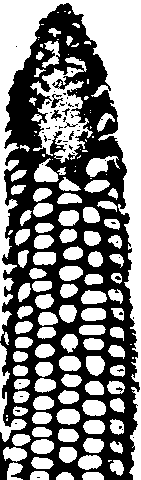

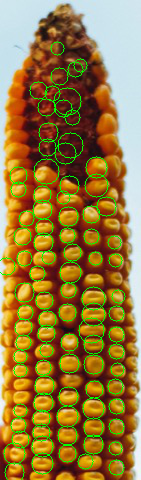

Count: 91


In [14]:
res, count = get_watershed_count(img, 5, 7, 15, circle=True)
cv2_imshow(res)
print("Count: {}".format(count))

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count6.jpg


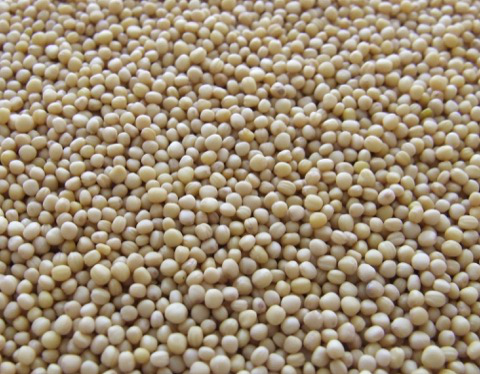

In [15]:
img = prepare_image("count6.jpg")
cv2_imshow(img)

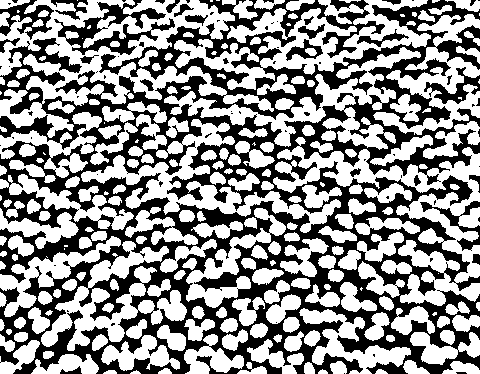

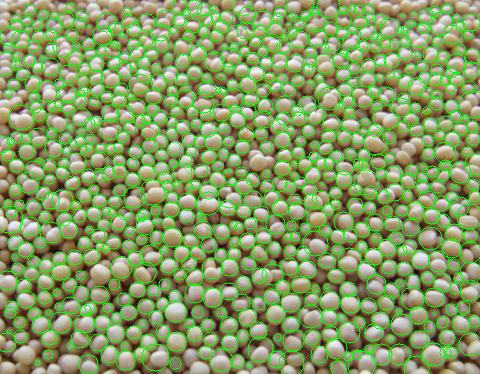

Count: 776


In [16]:
res, count = get_watershed_count(img, 5, 2, 15, circle=True)
cv2_imshow(res)
print("Count: {}".format(count))

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count7.jpg


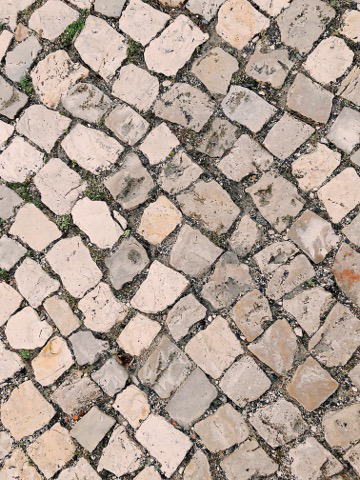

In [17]:
img = prepare_image("count7.jpg")
cv2_imshow(img)

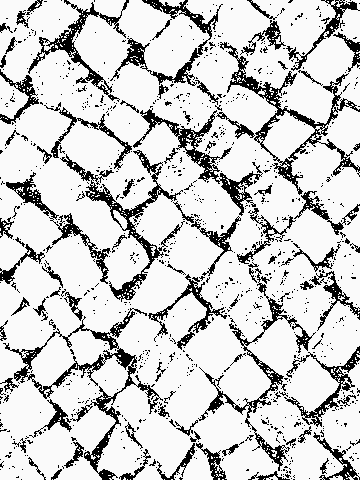

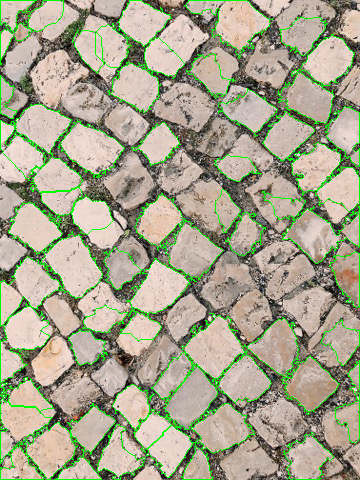

Count: 63


In [18]:
res, count = get_watershed_count(img, 4, 21, 50, circle=False, simple_thresh=100)
cv2_imshow(res)
print("Count: {}".format(count))

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count8.jpg


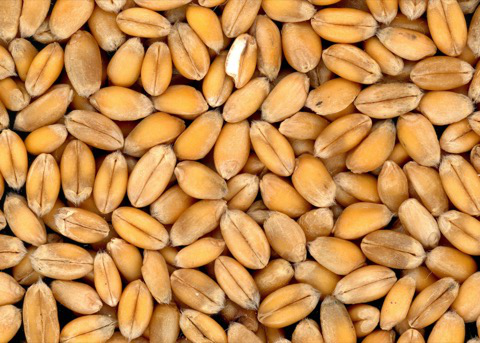

In [19]:
img = prepare_image("count8.jpg")
cv2_imshow(img)

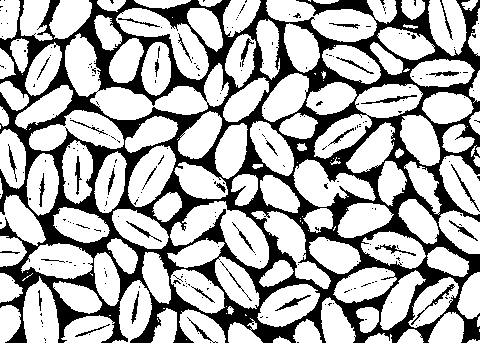

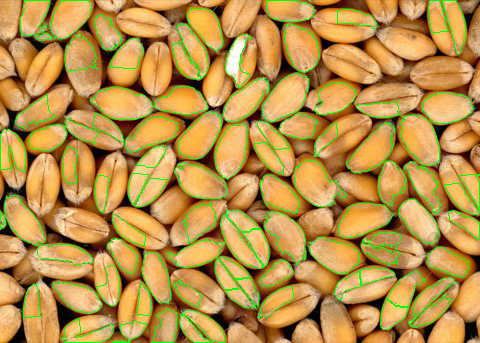

Count: 87


In [20]:
res, count = get_watershed_count(img, 7, 17, 50, circle=False)
cv2_imshow(res)
print("Count: {}".format(count))

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count9.jpg


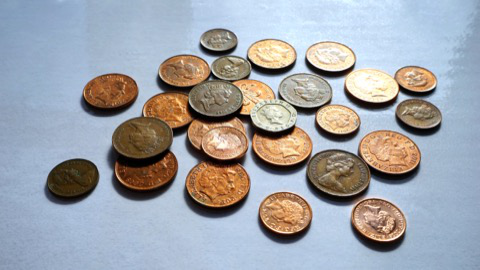

In [21]:
img = prepare_image("count9.jpg")
cv2_imshow(img)

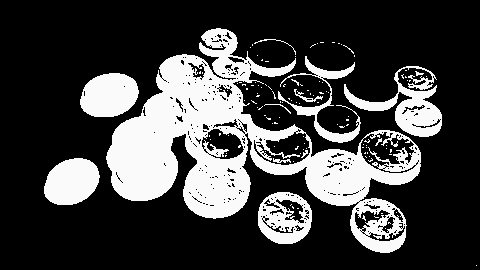

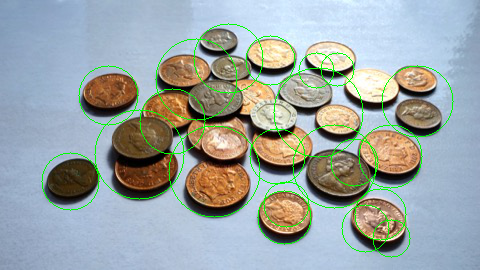

Count: 21


In [22]:
res, count = get_watershed_count(img, 20, 17, 50, circle=True, simple_thresh=150, inverse=True)
cv2_imshow(res)
print("Count: {}".format(count))

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count10.jpg


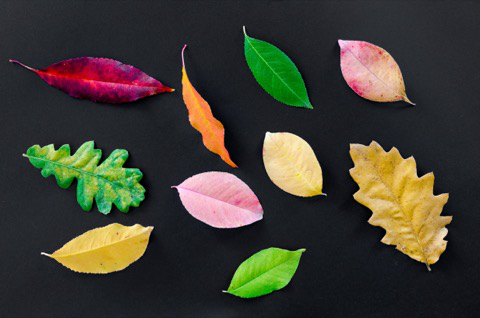

In [23]:
img = prepare_image("count10.jpg")
cv2_imshow(img)

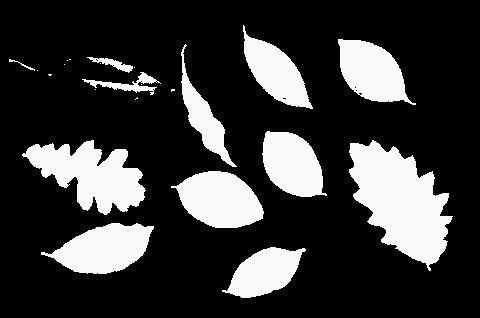

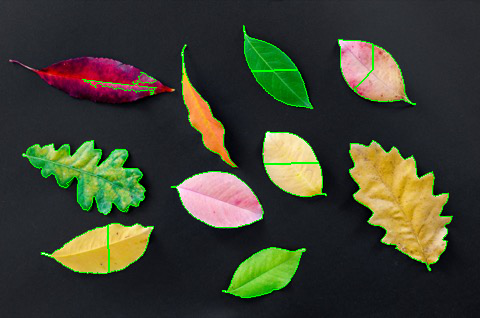

Count: 14


In [24]:
res, count = get_watershed_count(img, 30, 20, 160, circle=False, simple_thresh=60)
cv2_imshow(res)
print("Count: {}".format(count))

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count11.jpg


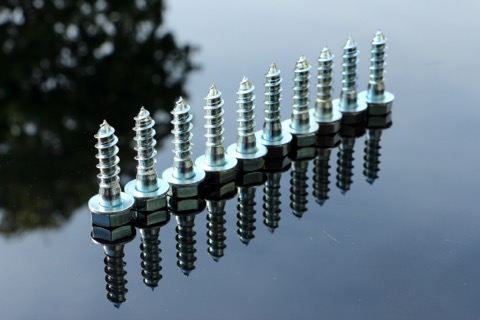

In [25]:
img = prepare_image("count11.jpg")
cv2_imshow(img)

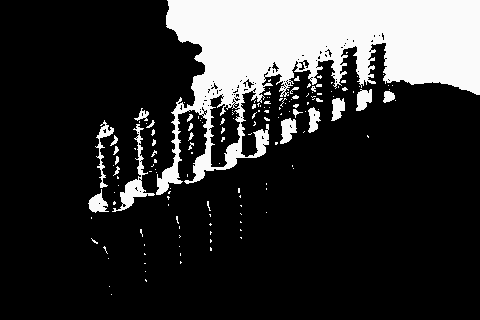

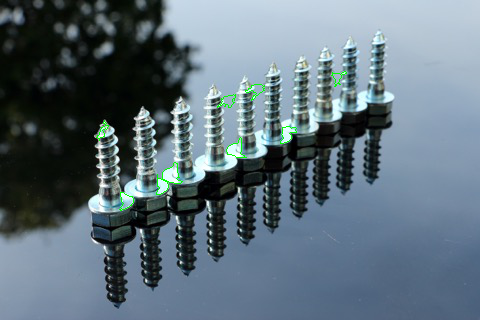

Count: 9


In [26]:
res, count = get_watershed_count(img, 5, 9, 12, circle=False, simple_thresh=180)
cv2_imshow(res)
print("Count: {}".format(count))

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count12.jpg


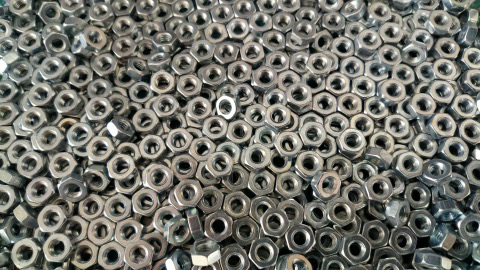

In [27]:
img = prepare_image("count12.jpg")
cv2_imshow(img)

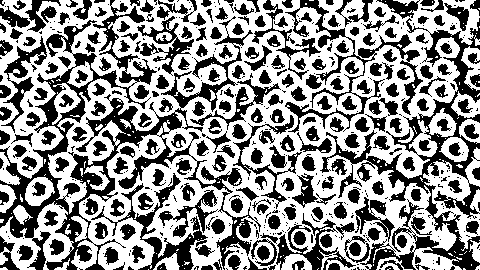

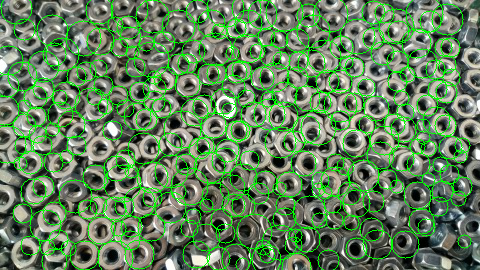

Count: 278


In [28]:
res, count = get_watershed_count(img, 9, 7, 20, circle=True)
cv2_imshow(res)
print("Count: {}".format(count))